In [4]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier #Adding Random Forest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss #Import log loss.

In [6]:
# Data Loading and Preprocessing (Modified)
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
X = []
Y = []

for label in labels:
    for folder in ['Training', 'Testing']:
        folder_path = os.path.join(folder, label)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (image_size, image_size))
                X.append(img.flatten()) # Flatten the image
                Y.append(label)

X = np.array(X)
Y = np.array(Y)


In [8]:
X, Y = shuffle(X, Y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Label encoding
y_train_encoded = [labels.index(label) for label in y_train]
y_test_encoded = [labels.index(label) for label in y_test]

In [11]:
# Flatten the images for machine learning models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

## RANDOM FOREST MODEL

In [13]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train_encoded)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test_encoded, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")
print(classification_report(y_test_encoded, rf_predictions, target_names=labels))

Random Forest Accuracy: 0.892802450229709
                  precision    recall  f1-score   support

    glioma_tumor       0.96      0.80      0.87       206
meningioma_tumor       0.83      0.91      0.87       194
        no_tumor       0.86      0.90      0.88        94
 pituitary_tumor       0.91      0.99      0.95       159

        accuracy                           0.89       653
       macro avg       0.89      0.90      0.89       653
    weighted avg       0.90      0.89      0.89       653



In [14]:
# Calculate accuracies
train_predictions = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train_encoded, train_predictions)

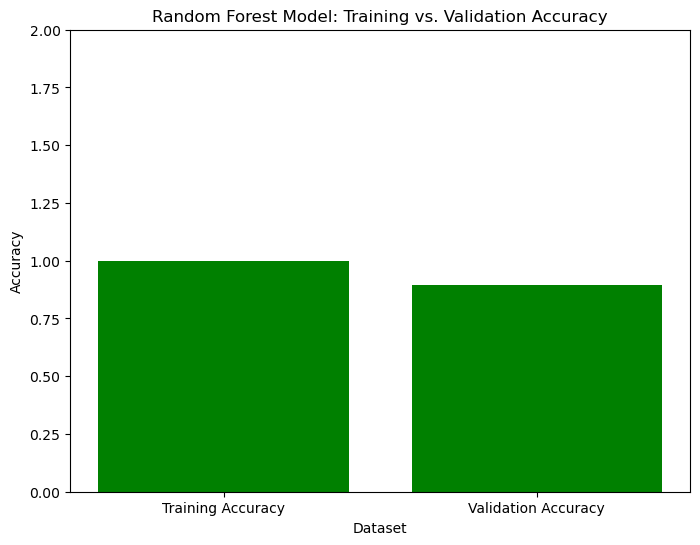

In [15]:

# Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(['Training Accuracy', 'Validation Accuracy'], [train_accuracy, rf_accuracy],color='green')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Random Forest Model: Training vs. Validation Accuracy')
plt.ylim(0, 2)  
plt.show()

In [19]:
rf_train_probs = rf_model.predict_proba(X_train)
rf_test_probs = rf_model.predict_proba(X_test)
rf_train_loss = log_loss(y_train_encoded, rf_train_probs)
print(rf_train_loss)
rf_test_loss = log_loss(y_test_encoded, rf_test_probs)
print(rf_test_loss)

0.10408246325657004
0.3774749344103637


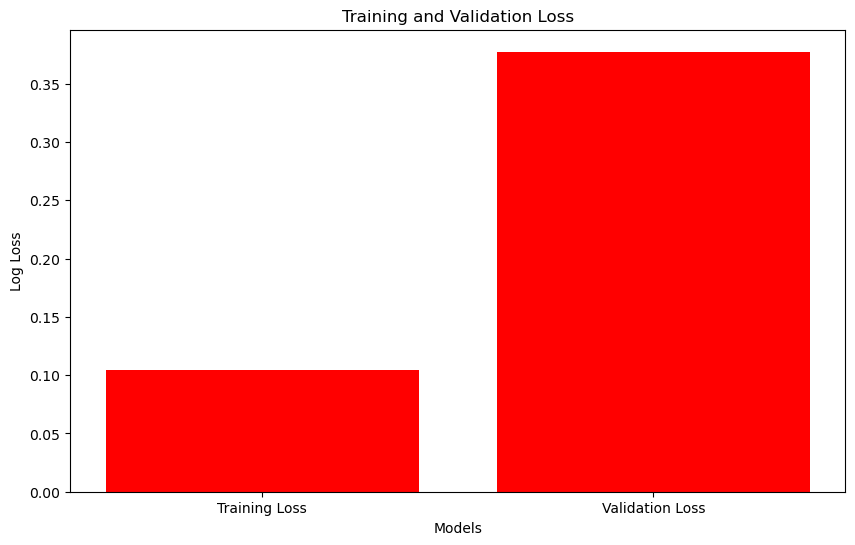

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(['Training Loss', 'Validation Loss'], [rf_train_loss, rf_test_loss],color='red')
plt.xlabel('Models')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss')
plt.show()

In [7]:
# Example Prediction (Random Forest)
def predict_image_rf(img_path):
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (image_size, image_size))
        img_flat = img.flatten()
        img_scaled = scaler.transform([img_flat])
        prediction = rf_model.predict(img_scaled)
        predicted_class = labels[prediction[0]]
        return predicted_class
    else:
        return "Error: Could not load image"

In [9]:
# Example usage
test_image_path = r"C:\Users\saisw\OneDrive\Desktop\Brain Tumor Detection Using Deep Learning\Testing\no_tumor\image(2).jpg"  # Replace with your image path
predicted_label = predict_image_rf(test_image_path)
print(f"Predicted Label: {predicted_label}")

Predicted Label: no_tumor


In [10]:
test_image_path2= r"C:\Users\saisw\OneDrive\Desktop\brain tumor project\images.jpg"
predicted_label = predict_image_rf(test_image_path2)
print(f"Predicted Label: {predicted_label}")

Predicted Label: no_tumor


In [13]:
test_image_path3= r"C:\Users\saisw\OneDrive\Desktop\brain tumor project\Testing\glioma_tumor\image(5).jpg"
predicted_label = predict_image_rf(test_image_path3)
print(f"Predicted Label: {predicted_label}")

Predicted Label: glioma_tumor


## SUPPORT VECTOR MACHINE(SVM)

In [ ]:
#SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True) # Using rbf kernel, you can try others
svm_model.fit(X_train, y_train_encoded)
svm_predictions = svm_model.predict(X_test)

In [13]:
svm_accuracy = accuracy_score(y_test_encoded, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")
print(classification_report(y_test_encoded, svm_predictions, target_names=labels))

SVM Accuracy: 0.8483920367534457
                  precision    recall  f1-score   support

    glioma_tumor       0.85      0.80      0.82       206
meningioma_tumor       0.78      0.80      0.79       194
        no_tumor       0.90      0.84      0.87        94
 pituitary_tumor       0.90      0.98      0.94       159

        accuracy                           0.85       653
       macro avg       0.86      0.85      0.85       653
    weighted avg       0.85      0.85      0.85       653



In [17]:
# Calculate accuracies
train_predictions = svm_model.predict(X_train)
svm_train_accuracy = accuracy_score(y_train_encoded, train_predictions)

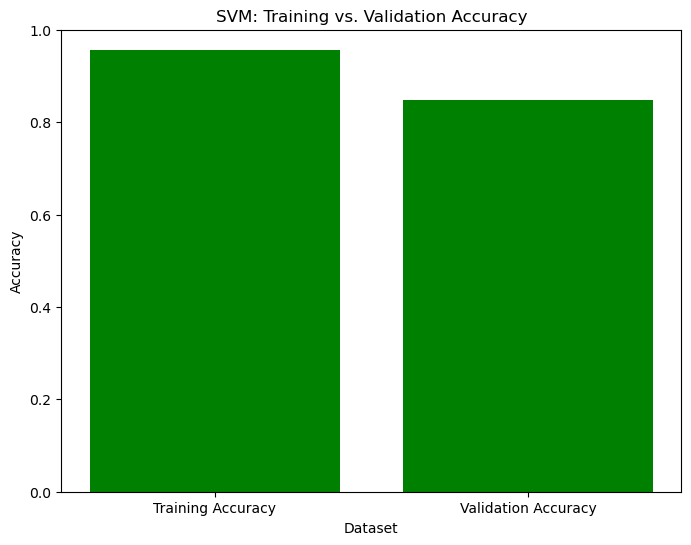

In [31]:
# Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(['Training Accuracy', 'Validation Accuracy'], [svm_train_accuracy, svm_accuracy],color='green')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('SVM: Training vs. Validation Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1
plt.show()

In [ ]:
# Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(['Training Loss', 'Validation Loss'], [svm_train_loss, svm_loss],color='red')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('SVM: Training vs. Validation Loss')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1
plt.show()

## K-NEAREST NEIGHBORS(KNN)

In [23]:
# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train_encoded)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test_encoded, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy}")
print(classification_report(y_test_encoded, knn_predictions, target_names=labels))

KNN Accuracy: 0.7534456355283308
                  precision    recall  f1-score   support

    glioma_tumor       0.72      0.83      0.77       206
meningioma_tumor       0.75      0.52      0.62       194
        no_tumor       0.71      0.72      0.72        94
 pituitary_tumor       0.81      0.96      0.88       159

        accuracy                           0.75       653
       macro avg       0.75      0.76      0.75       653
    weighted avg       0.75      0.75      0.74       653



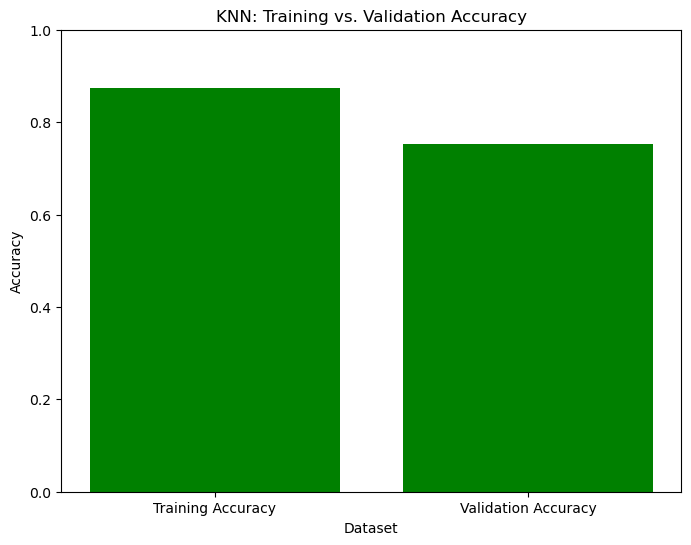

In [33]:

# Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(['Training Accuracy', 'Validation Accuracy'], [knn_train_accuracy, knn_validation_accuracy],color='green')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('KNN: Training vs. Validation Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1
plt.show()

In [37]:
knn_train_probs = knn_model.predict_proba(X_train)
knn_test_probs = knn_model.predict_proba(X_test)
knn_train_loss = log_loss(y_train_encoded, knn_train_probs)
print(knn_train_loss)
knn_test_loss = log_loss(y_test_encoded, knn_test_probs)
print(knn_test_loss)

0.2746875579391987
1.9620381949753092


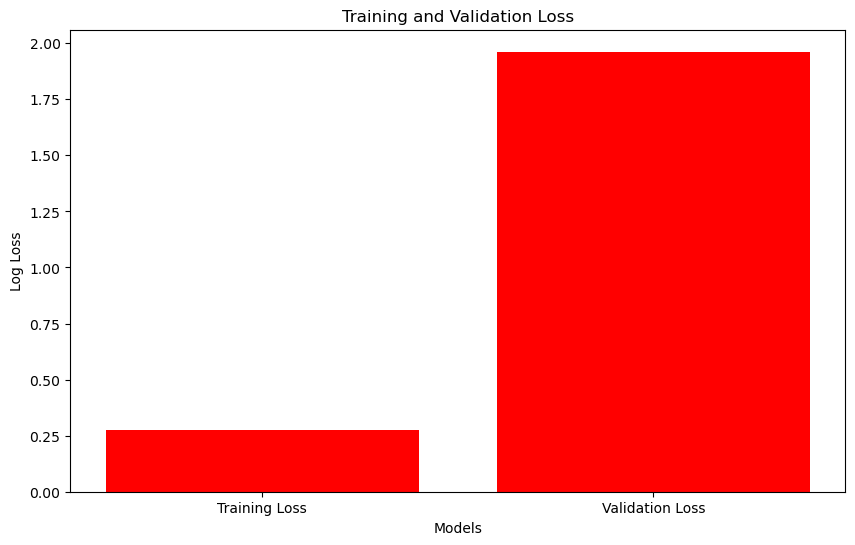

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(['Training Loss', 'Validation Loss'], [knn_train_loss, knn_test_loss],color='red')
plt.xlabel('Models')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss')
plt.show()

## NAIVE BAYES MODEL

In [7]:
# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train_encoded)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test_encoded, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(classification_report(y_test_encoded, nb_predictions, target_names=labels))

Naive Bayes Accuracy: 0.5206738131699847
                  precision    recall  f1-score   support

    glioma_tumor       0.46      0.84      0.59       206
meningioma_tumor       0.42      0.08      0.13       194
        no_tumor       0.49      0.54      0.52        94
 pituitary_tumor       0.76      0.63      0.69       159

        accuracy                           0.52       653
       macro avg       0.53      0.52      0.48       653
    weighted avg       0.52      0.52      0.47       653



In [9]:
# Calculate accuracies
train_predictions = nb_model.predict(X_train)
train_accuracy = accuracy_score(y_train_encoded, train_predictions)

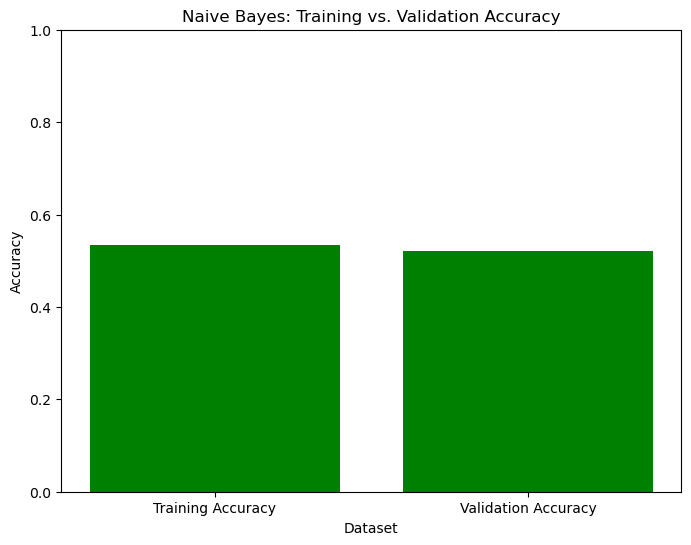

In [11]:
# Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(['Training Accuracy', 'Validation Accuracy'], [train_accuracy, nb_accuracy],color='green')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Naive Bayes: Training vs. Validation Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1
plt.show()

In [41]:
nb_train_probs = nb_model.predict_proba(X_train)
nb_test_probs = nb_model.predict_proba(X_test)
nb_train_loss = log_loss(y_train_encoded, nb_train_probs)
print(nb_train_loss)
nb_test_loss = log_loss(y_test_encoded, nb_test_probs)
print(nb_test_loss)

16.777836380467228
17.276666938428292


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


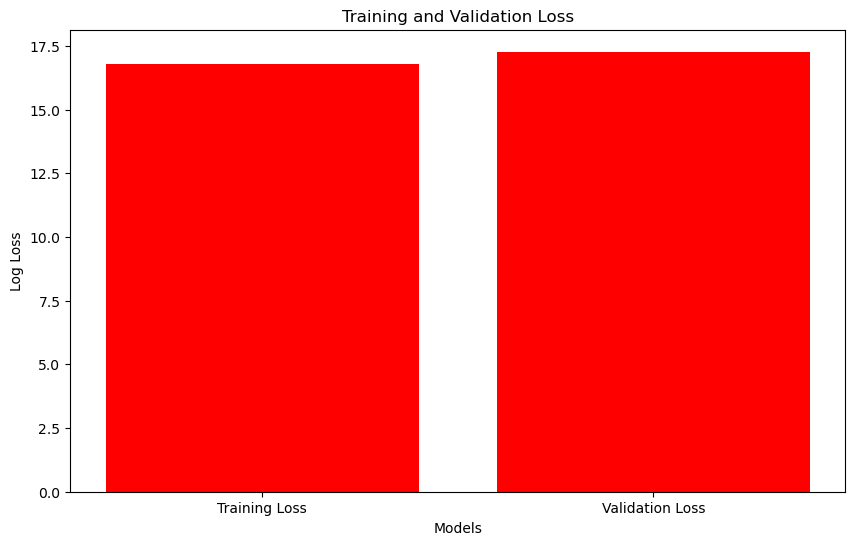

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(['Training Loss', 'Validation Loss'], [nb_train_loss, nb_test_loss],color='red')
plt.xlabel('Models')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss')
plt.show()